## The dataset contains features of customers from a store for different products like wine, meat, fish, fruits etc. The features of customers include income, children, spendings on different products, first purchase date etc. The goal of this analysis is to segment the customers based on their purchasing behaviors

In [201]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [202]:
# Reading dataset
data_all = pd.read_csv('marketing_campaign.csv', sep = '\t')
print("Features of the customers: \n")
data_all.columns.to_numpy()

Features of the customers: 



array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response'], dtype=object)

In [203]:
data = data_all.loc[:, ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
                    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179
std,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000
75%,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000


In [204]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,3,8,10,4
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,1,1,2
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,1,8,2,10
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,2,0,4
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,5,3,6


Income has (2240-2216) = 24 empty cells. For this analysis, we will remove the rows with empty Income values.

In [205]:
# Dropping the missing rows
data = data.dropna()

Year of Birth: [ Max = 1996, Min = 1893, Avg = 1968 ]  
Income: [ Max = 666666, Min = 1730, Avg = 52247 ]  
Kids in home: [ Max = 2, Min = 0, Avg = 0.441 ]  
Teens in home: [ Max = 2, Min = 0, Avg = 0.505 ]  
Amount spent on Wines = [ Max = 1493, Min = 0, Avg = 305 ]  
Amount spent on fruits = [ Max = 199, Min = 0, Avg = 26 ]  
Amount spent on Meat = [ Max = 1725, Min = 0, Avg = 167 ]  
Amount spent on fish = [ Max = 259, Min = 0, Avg = 38 ]  
Amount spent on sweets = [ Max = 262, Min = 0, Avg = 27 ]  
Amount spend on gold = [ Max = 321, Min = 0, Avg = 44 ]  
Number of deals purchased = [ Max = 15, Min  =0, Avg = 2 ]  
Number of purchases from web = [ Max = 27, Min = 0, Avg = 4 ]  
Number of catalog purchases = [ Max = 28, Min = 0, Avg = 3 ]
Number of purchases from store = [ Max = 13, Min = 0, Avg = 6 ]

Questions of interest:  
1. How much percentage of income is spent on different products (eg. wine, fruits, gold etc.)?  
2. Is there any relation between age of a person and the food products he spends upon?  
3. Is there any relation between education level and income?  
4. IS there any relation between age of a person and his spending source (eg. store, website)?  
5. Group similar customerss

In [206]:
# # Get percentage spendings on different products
# def get_percentage_spendings(product_name):
#   new_column_name = product_name[3:].lower() + '%'
#   data[new_column_name] = data[product_name]/data['Income']*100
# get_percentage_spendings('MntWines')
# get_percentage_spendings('MntFruits')
# get_percentage_spendings('MntMeatProducts')
# get_percentage_spendings('MntFishProducts')
# get_percentage_spendings('MntSweetProducts')
# get_percentage_spendings('MntGoldProds')
# data.loc[:, ['wines%', 'fruits%', 'meatproducts%', 'fishproducts%', 'sweetproducts%', 'goldprods%']].head()

In [207]:
# correlations between age and products a person spends upon
data['age'] = 2025 - data['Year_Birth']
# age_food_products_columns = []
# for column in data.columns:
#   if column[-1] == '%':
#     age_food_products_columns.append(column)
# age_food_products_columns.insert(0, 'age')
# data.loc[:, age_food_products_columns].corr()

Age has 17% correlation with wine. Other than that there is no significant correlation between age and other products.  
*Note: There is higher correlation between (fruits and fish consumption), (fruits and sweets consumption), (fish and sweets consumption)

In [208]:
# converting education levels to numbers and finding correlation between education level and income of a person
education_map = {'Basic': -2, '2n Cycle': -1, 'Graduation': 0, 'Master': 1, 'PhD': 2}
data['edu_map'] = data['Education'].map(education_map)
data.loc[:, ['edu_map', 'Income']].corr()

,edu_map,Income
edu_map,1.000000,0.149338
Income,0.149338,1.000000


There is 14% correlation between education level with income

In [209]:
# # Finding correlation between age and spending source (stores, websites etc.) of a person
# age_spending_sources_columns = []
# for column in data.columns:
#   if column[-9:] == 'Purchases':
#     age_spending_sources_columns.append(column)
# age_spending_sources_columns.insert(0, 'age')
# data.loc[:, age_spending_sources_columns].corr()

Correlation between Age and spendings on deals = 6%  
Correlation between Age and spendings at websites = 15%  
Correlation between Age and spendings on catalogs = 12%  
Correlation between Age and spendings at stores = 13%

In [210]:
# Creating new categories for marital status, and One-hot-encoding is applied on marital status
data.loc[data['Marital_Status'] == 'Together', 'Marital_Status'] = 'Couple'
data.loc[data['Marital_Status'] == 'Married', 'Marital_Status'] = 'Couple'
data.loc[data['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Widow', 'Marital_Status'] = 'Single'
data['Marital_Status'] = data['Marital_Status'].astype('category')
marital_encoded = pd.get_dummies(data['Marital_Status'])
data = pd.concat([data, marital_encoded], axis = 1)

In [211]:
# Data preprocessing - creating new column, updating datatype of a column, feature scaling
data['children'] = data['Kidhome'] + data['Teenhome']
data[['Single', 'Couple']] = data[['Single', 'Couple']].astype(int)

In [212]:
# filtered_columns = ['age', 'edu_map', 'Single', 'Couple', 'Divorced', 'Widow', 'children', 'Income', 'wines%', 'fruits%', 'meatproducts%', 'fishproducts%', 'sweetproducts%',
#                     'goldprods%']
filtered_columns = ['age', 'edu_map', 'Single', 'children', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds']
filtered_data = data.loc[:, filtered_columns]
print(f"Checking if any column has null values or not: \n{filtered_data.isnull().any()}")

# removing outliers
print(filtered_data.shape)
# filtered_data = filtered_data.drop(labels = [20, 153, 674, 1636])
print(filtered_data.shape)
print("Data to perform clustering upon: \n")
filtered_data.head()

Checking if any column has null values or not: 
age                 False
edu_map             False
Single              False
children            False
Income              False
MntWines            False
MntFruits           False
MntMeatProducts     False
MntFishProducts     False
MntSweetProducts    False
MntGoldProds        False
dtype: bool
(2216, 11)
(2216, 11)
Data to perform clustering upon: 



,age,edu_map,Single,children,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,68,0,1,0,58138.0,635,88,546,172,88,88
1,71,0,1,2,46344.0,11,1,6,2,1,6
2,60,0,0,0,71613.0,426,49,127,111,21,42
3,41,0,0,1,26646.0,11,4,20,10,3,5
4,44,2,0,1,58293.0,173,43,118,46,27,15


In [213]:
scaler = StandardScaler()
# removed children, single, edu_map for now. Will add them back
filtered_data_scaled = scaler.fit_transform(filtered_data.loc[:, ['age','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']])
filtered_data_scaled = pd.DataFrame(filtered_data_scaled, columns = ['age','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])
filtered_data_scaled.head()

,age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.986443,0.234063,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031
1,1.236801,-0.234559,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867
2,0.318822,0.769478,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937
3,-1.266777,-1.017239,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171
4,-1.016420,0.240221,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135


In [214]:
cols = ['age','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for col in cols:
  print(col)
  print(filtered_data_scaled[col].max())
  print(filtered_data_scaled[col].min())
print(filtered_data_scaled[filtered_data_scaled['Income'] > 20])
filtered_data_scaled = filtered_data_scaled.drop([2209])
print(filtered_data_scaled.shape)

age
6.3274096281587155
-2.2682086556440346
Income
24.413282343327047
-2.0072498165563903
MntWines
3.522318916593794
-0.9046404106083532
MntFruits
4.339430127185715
-0.6624629594888422
MntMeatProducts
6.948158444610826
-0.7447440414072365
MntFishProducts
4.04390697390871
-0.6875744052131553
MntSweetProducts
5.722241252326637
-0.6582331380486047
MntGoldProds
5.347776904638855
-0.8486890736057782
           age     Income  MntWines  MntFruits  MntMeatProducts  \
2209 -0.682609  24.413282 -0.877954  -0.310571         -0.66447   

      MntFishProducts  MntSweetProducts  MntGoldProds  
2209        -0.541428          -0.63388     -0.617045  
(2215, 8)


In [215]:
import copy
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(filtered_data_scaled.columns)
vif_limit = 5.0
X_vif = copy.deepcopy(filtered_data_scaled)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = filtered_data_scaled.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(filtered_data_scaled.values, i)
                          for i in range(len(filtered_data_scaled.columns))]

print(vif_data)

def remove_features_with_vif(X_vif, vif_data):
  dropped_features = []
  while(True and len(X_vif.columns) > 0):
    highest_vif_feature = vif_data[vif_data['VIF'] == max(vif_data['VIF'])]['feature']
    dropped_features.append(highest_vif_feature)
    X_vif = X_vif.drop(highest_vif_feature, axis = 1)
    vif_data = pd.DataFrame()
    vif_data['feature'] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
    if vif_data[vif_data["VIF"] > vif_limit].shape[0] == 0:
      break
  print(vif_data)
  return X_vif.columns

selected_features = remove_features_with_vif(X_vif, vif_data)
print(f"Selected Features: {selected_features}")

Index(['age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')
            feature       VIF
0               age  1.073182
1            Income  2.837495
2          MntWines  2.028159
3         MntFruits  1.903645
4   MntMeatProducts  2.388610
5   MntFishProducts  2.022857
6  MntSweetProducts  1.858594
7      MntGoldProds  1.353869
            feature       VIF
0               age  1.032474
1          MntWines  1.626382
2         MntFruits  1.890169
3   MntMeatProducts  2.070274
4   MntFishProducts  2.013739
5  MntSweetProducts  1.820802
6      MntGoldProds  1.352659
Selected Features: Index(['age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')


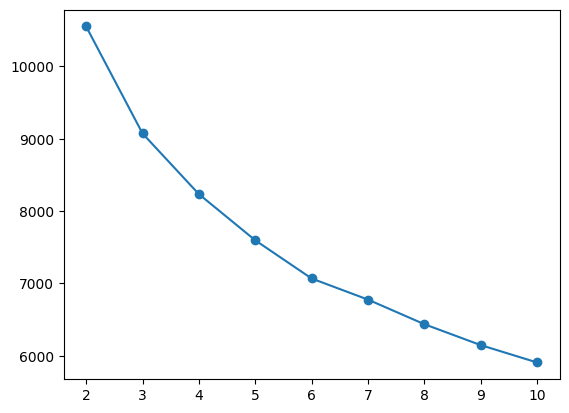

In [216]:
# Using Elbow method to find optimum number of clusters in the data
wcss = []
state = 42
n_clusters = range(2, 11)
for n_cluster in n_clusters:
  kmeans = KMeans(n_clusters = n_cluster, init = 'k-means++', random_state = state)
  kmeans.fit(filtered_data_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(n_clusters, wcss, marker = 'o')

In [217]:
# def get_k_fold_cv(k, random_state, X):
#   kfold = KFold(n_splits = k, shuffle = True, random_state = random_state)
#   spl = kfold.split(X)
#   return spl


def fit_kmeans_clustering(X):
  no_of_clusters = range(2, 11)
  result_n_clusters = []
  scores = []
  for n_cluster in no_of_clusters:
    kmeans_train = KMeans(n_clusters = n_cluster, init = 'k-means++', random_state = state)
    output = kmeans_train.fit_predict(X)
    score = silhouette_score(X, output)
    # X = pd.concat([X, pd.DataFrame(output, columns = ['cluster'], index = X.index)], axis = 1)
    print(f"Number of clusters: {n_cluster} and Silhouette score: {score}")
    result_n_clusters.append(output)
    scores.append(score)
  return result_n_clusters, scores

result_n_clusters, scores = fit_kmeans_clustering(filtered_data_scaled)
# filtered_data_scaled.head()

# number_of_folds = 10
# random_state = 42
# spl = get_k_fold_cv(number_of_folds, random_state, filtered_data_scaled)

# for i, (train_index, test_index) in enumerate(spl):
#   print(f"Fold: {i}")
#   model, test_r2_fold_i = fit_regression_model_ols_and_get_test_r2(train_index, test_index, X3, y3)
#   test_r2.append(test_r2_fold_i)
#   regressor4_models.append(model)
# mean_test_r2 = np.mean(test_r2)
# print(f"Mean test R-Squared from {number_of_folds} folds: {mean_test_r2}")

Number of clusters: 2 and Silhouette score: 0.4219586400724911
Number of clusters: 3 and Silhouette score: 0.3209589736671203
Number of clusters: 4 and Silhouette score: 0.23375812361013135
Number of clusters: 5 and Silhouette score: 0.24076943601638287
Number of clusters: 6 and Silhouette score: 0.2436991164961634
Number of clusters: 7 and Silhouette score: 0.24688993342567392
Number of clusters: 8 and Silhouette score: 0.17896246889639703
Number of clusters: 9 and Silhouette score: 0.18150447497934294
Number of clusters: 10 and Silhouette score: 0.18511177048473546


Optimum number of clusters is 4

In [218]:
# for n_cluster in n_clusters:
#   # Applying PCA for dimensionality reduction
#   pca = PCA(n_components = 2)
#   output = result_n_clusters[n_cluster-2]
#   filtered_data_pca = pca.fit_transform(filtered_data_scaled)
#   print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

#   # Plotting the clusters
#   fig = plt.figure(figsize=(8,4))
#   plt.scatter(filtered_data_pca[:, 0], filtered_data_pca[:, 1], c = output, cmap = 'viridis')
#   plt.title("Clusters visualized using PCA")
#   plt.xlabel("Principal Component 1")
#   plt.ylabel("Principal Component 2")
#   plt.show()
# # filtered_data_pca1 = []
# # output1 = []
# # j = 0
# # for entry in filtered_data_pca:
# #   if entry[1] > 1000:
# #     print(entry)
# #     print(j)
# #     print(output[j])
# #   else:
# #     entry_i = [float(entry[0]), float(entry[1])]
# #     filtered_data_pca1.append(entry_i)
# #     output1.append(output[j])
# #   j+=1

n_comps = range(2, filtered_data_scaled.shape[1]+1)
all_scores = []
for n_comp in n_comps:
  filtered_data_scaled1 = copy.deepcopy(filtered_data_scaled)
  pca = PCA(n_components = n_comp)
  filtered_data_pca = pca.fit_transform(filtered_data_scaled1)
  print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
  result_n_clusters, scores = fit_kmeans_clustering(filtered_data_pca)
  all_scores.append(scores)
avg_cluster_scores = [0] * len(all_scores[0])
for row in all_scores:
  for i_cluster_score in range(len(row)):
    avg_cluster_scores[i_cluster_score] += row[i_cluster_score]/len(all_scores)
print(f"Avg cluster scores: {avg_cluster_scores}")
  # score = silhouette_score(filtered_data_scaled, output)
  # print(f"Number of clusters: {2} and Silhouette score: {score}")

Explained variance ratio: [0.49583689 0.13823054]
Number of clusters: 2 and Silhouette score: 0.5458496271253052
Number of clusters: 3 and Silhouette score: 0.4317479122340936
Number of clusters: 4 and Silhouette score: 0.39251612063502267
Number of clusters: 5 and Silhouette score: 0.3650470056946227
Number of clusters: 6 and Silhouette score: 0.3848675865876665
Number of clusters: 7 and Silhouette score: 0.36142078684057394
Number of clusters: 8 and Silhouette score: 0.3725287323477913
Number of clusters: 9 and Silhouette score: 0.3572616501835009
Number of clusters: 10 and Silhouette score: 0.3373794122512122
Explained variance ratio: [0.49583689 0.13823054 0.09388027]
Number of clusters: 2 and Silhouette score: 0.49589566565967874
Number of clusters: 3 and Silhouette score: 0.3711756631586091
Number of clusters: 4 and Silhouette score: 0.335331606131251
Number of clusters: 5 and Silhouette score: 0.32166181806913
Number of clusters: 6 and Silhouette score: 0.3356809186227494
Number

In [219]:
# # Plotting the clusters
# fig = plt.figure(figsize=(8,4))
# plt.scatter(filtered_data_pca[:, 0], filtered_data_pca[:, 1], c = output, cmap = 'viridis')
# plt.title("Clusters visualized using PCA")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

There are outliers in the data. PCA helped to identify the outliers. We need to process or remove the outliers before applying clustering